# Introduction to Digital Image Treatment

OpenCV is one of the most popular libraries for DIT, it was originally wrote in C but since some time ago we can find Python bindings that let us to use with the simplied pythonic synthaxis.

Let's begin to play some with the library

In [3]:
# Import modules
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

* **CV2**: The OpenCV python binding library, it will let us to access to all the functions available in the library
* **Numpy**: Numpy is an efficient matrix manipulation library, we will see that all our images will be treated as matrixes or vectors so we need a library to manipulate them.
* **Imutils**: An useful image transformation library.
* **Matplotlib**: As this library can be useful for different purposes, we will use it mainly for visualization purposes.

In [4]:
# Let's load an image

image = cv2.imread("teach_images/yiyo_pereza.png") # Loads color image
print(image)

[[[136 144 151]
  [136 144 151]
  [135 143 150]
  ...
  [179 187 194]
  [179 187 194]
  [179 187 194]]

 [[136 144 151]
  [136 144 151]
  [135 143 150]
  ...
  [179 187 194]
  [179 187 194]
  [179 187 194]]

 [[136 144 151]
  [136 144 151]
  [136 144 151]
  ...
  [179 187 194]
  [179 187 194]
  [179 187 194]]

 ...

 [[228 233 232]
  [229 234 233]
  [230 235 234]
  ...
  [208 220 220]
  [207 221 220]
  [207 221 220]]

 [[228 233 232]
  [229 234 233]
  [230 235 234]
  ...
  [208 220 220]
  [207 221 220]
  [207 221 220]]

 [[228 233 232]
  [229 234 233]
  [230 235 234]
  ...
  [208 220 220]
  [207 221 220]
  [207 221 220]]]


What did I print? What those numbers mean?

Most of the computers interpret an image as an array of color representation of 8 bits, this means, a number between 0 and 255. What you see in the last print statemen is this representation splitted into three different color channels: Red, Green and Blue, represented by a matrix that stores the pixels color representation of the image, this is what your computer 'sees' and that is why artificial vision applications requires some of math to be developed. For our fortune, OpenCV treats with it for us !!

<img src="teach_images/image_representation.png">

The RGB color space means that you have a 8-bit unsigned representation for every color, below you can find some examples:


* <img src="teach_images/rgb_255_0_0.png", width="20px" align="left" top="10px" bottom="10px"> **Pure Red** [255, 0, 0]

* <img src="teach_images/rgb_0_255_0.png" width="20px" align="left" top="10px" bottom="10px"> **Pure Green** [0, 255, 0]
* <img src="teach_images/rgb_255_255_0.png" width="20px" align="left" top="10px" bottom="10px"> **Mix of Red and Green** [255, 255, 0]
* <img src="teach_images/rgb_0_127_127.png" width="20px" align="left" top="10px" bottom="10px"> **Attenuate mix of Green and Blue** [0, 127, 127]

Keeping this in mind, it means that the last pixel from Yiyo's picture ```[207 221 220]``` has this color:

* <img src="teach_images/rgb_207_221_220.png" width="20px" align="left" top="10px" bottom="10px"> ** Yiyo's last pixel** [207 221 220]

Finally, most of applications manages the color space as **RGB** but OpenCV manages it as **BGR**, so please **keep this in mind** as it will be very important in the incoming lesson

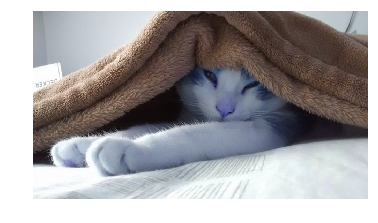

In [7]:
# Let's show the image to see how this array 'looks'
%matplotlib inline

plt.axis('off')
plt.imshow(image)
plt.show()

**Why the first signal is plotted in a 'strange' way?**

Images are treated as an array of three channels: Red, Green and Blue. Opencv treats with them as BGR while matplot treats with them as RGB.

Let's solve this

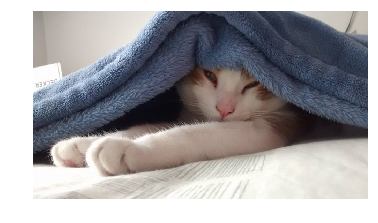

In [8]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

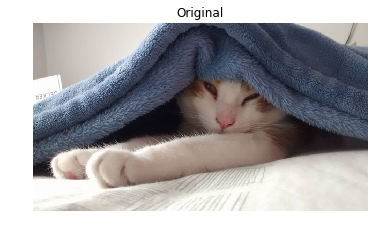

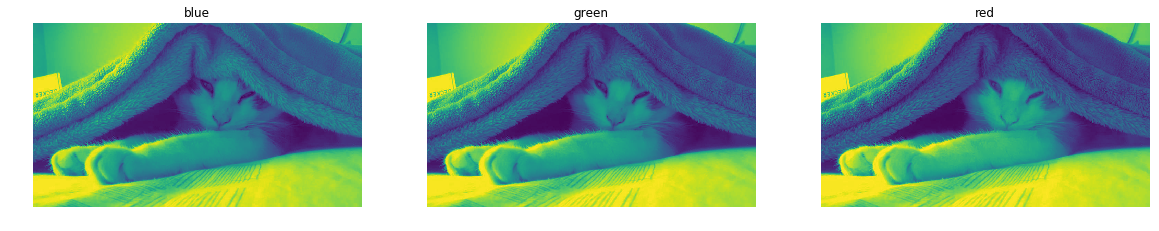

In [37]:
# Nice, now let's split the channels

image = cv2.imread("teach_images/yiyo_pereza.png")
blue, green, red = cv2.split(image)

# Original one
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Splitted channels
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.axis('off')
plt.title('blue')
plt.imshow(blue)
plt.subplot(132)
plt.axis('off')
plt.title('green')
plt.imshow(green)
plt.subplot(133)
plt.title('red')
plt.axis('off')
plt.imshow(red)

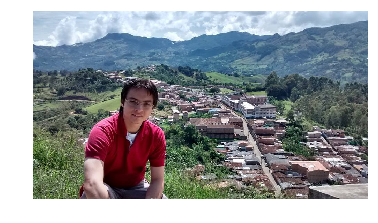

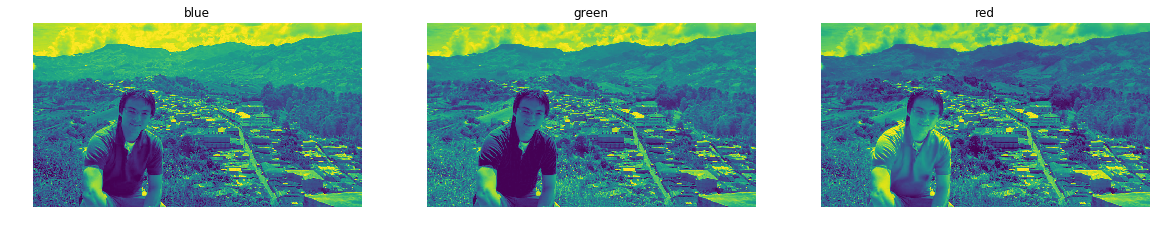

In [33]:
# Let's split another image
image = cv2.imread("teach_images/jerico_2.png")
blue, green, red = cv2.split(image)

# Original one
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Splitted channels
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.axis('off')
plt.title('blue')
plt.imshow(blue)
plt.subplot(132)
plt.axis('off')
plt.title('green')
plt.imshow(green)
plt.subplot(133)
plt.title('red')
plt.axis('off')
plt.imshow(red)

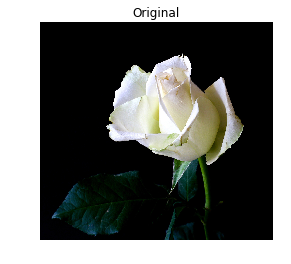

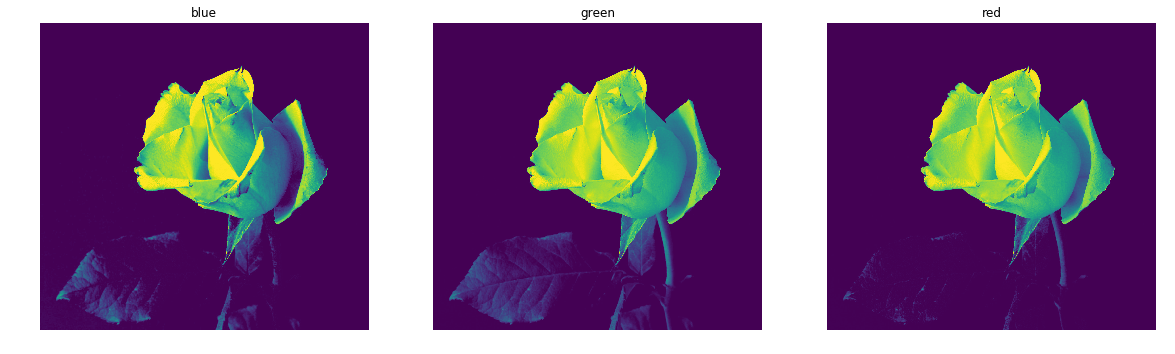

In [35]:
# Let's split another image
image = cv2.imread("teach_images/rose.png")
blue, green, red = cv2.split(image)

# Original one
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Splitted channels
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.axis('off')
plt.title('blue')
plt.imshow(blue)
plt.subplot(132)
plt.axis('off')
plt.title('green')
plt.imshow(green)
plt.subplot(133)
plt.title('red')
plt.axis('off')
plt.imshow(red)

One of the main RGB split channels are mask, look that the red channel would serve us to get most of the information of the rose's petals. We will review the mask concept later in the lesson.

## Grayspace Images

From our previous job, we know that an image is represented as a RGB matrix, but to process a three columns matrix can be computationally costly and because of this many applications transforms the image in a vector array of 'gray' pixels intensities.

Be careful, a grayscale space vector does not mean black or white, it is a new representation of the RGB space:

Y = 0.299 x R + 0.587 x G + 0.114 x B

due to the cones and receptors in our eyes, we are able to perceive nearly 2x the amount of green than red. And similarly, we notice over twice the amount of red than blue. Thus, we make sure to account for this when converting from RGB to grayscale.

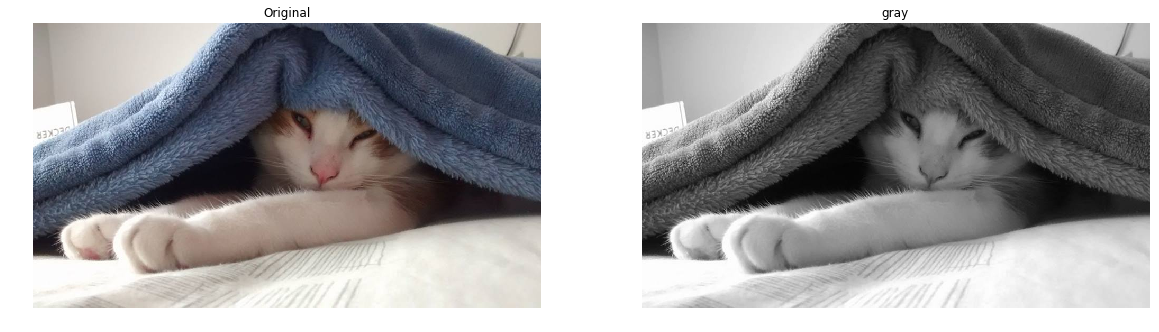

In [49]:
# Let's create a grayscale image

image = cv2.imread("teach_images/yiyo_pereza.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')


In [50]:
# Let's print the gray array

print(gray)

[[145 145 144 ... 188 188 188]
 [145 145 144 ... 188 188 188]
 [145 145 145 ... 188 188 188]
 ...
 [232 233 234 ... 219 219 219]
 [232 233 234 ... 219 219 219]
 [232 233 234 ... 219 219 219]]


In [51]:
# Let's print the shapes of both color and gray

print(image.shape)
print(gray.shape)

(539, 960, 3)
(539, 960)


## Binary Images

One of the main application of the grayscale images is to create binary images, that contains **only** two possible pixel values: 0 or 255. The main application of binary images is mask creation to extract a region of interest of the image based on the number of pixels that are equals to zero or higher than zero.

Let's create some examples

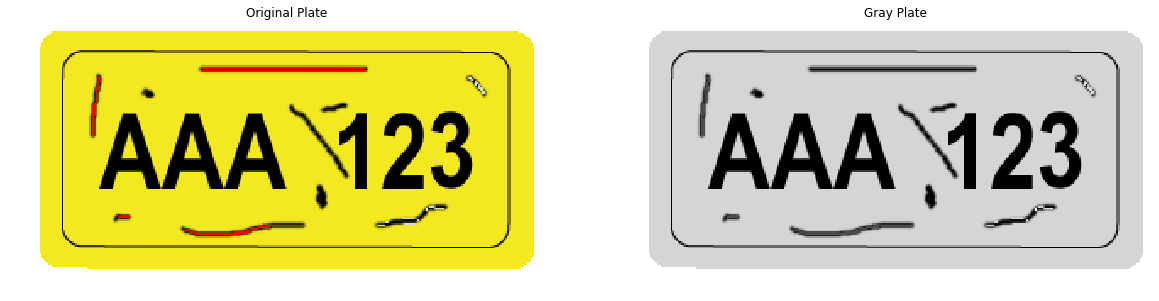

In [60]:
# Our objective will be to extract a mask with only the letters and number of a license plate

plate = cv2.imread("teach_images/license_plate.png")
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Original Plate')
plt.axis('off')
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('Gray Plate')
plt.axis('off')
plt.imshow(gray, cmap='gray')

## Thresholding

Thresholding is one of the most common (and basic) segmentation techniques in computer vision and it allows us to separate the foreground (i.e. the objects that we are interested in) from the background of the image.

For the example, we will use a simple thresholding, We must specify a threshold value T. All pixel intensities below T are set to 255. And all pixel intensities greater than T are set to 0.

Keep in mind that our main objetive is to extract the letter and numbers of the plate, so we want to extract intensities of 255 which are 'pure' black.

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


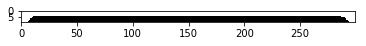

In [90]:
# Let's look some representations of some aparts of the image

# The top of the image, which is only yellow
print(gray[0:10])

plt.imshow(gray[0:10], cmap='gray')

[[213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]
 ...
 [213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]]


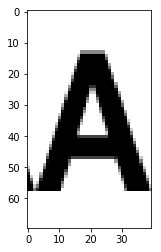

In [101]:
# Let's look some representations of some aparts of the image

# One of the letters (mainly black)
print(gray[40: 110, 110:150])

plt.imshow(gray[40: 110, 110:150], cmap='gray')

[[213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]
 [213 213 213 ... 213 213 213]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


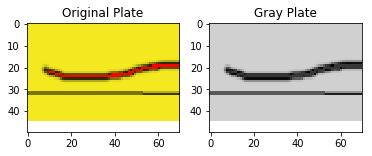

In [104]:
# Let's look some representations of some aparts of the image

# One of the noisy region
print(gray[100: 170, 80:150])
plt.subplot(121)
plt.title('Original Plate')
plt.imshow(cv2.cvtColor(plate[100: 170, 80:150], cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('Gray Plate')
plt.imshow(gray[100: 170, 80:150], cmap='gray')

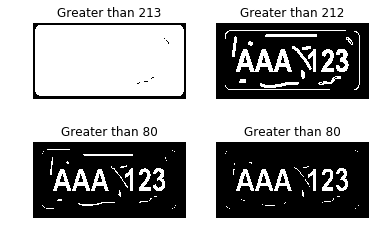

In [111]:
# Let's apply a threshold

# If a pixel value is greater than our threshold (in this case,
# 213), we set it to be BLACK, otherwise it is WHITE.
# REMEMBER: Black regions are in the order of 213
(T, thresh_1) = cv2.threshold(gray, 213, 255, cv2.THRESH_BINARY_INV)

# If a pixel value is greater than our threshold (in this case,
# 212), we set it to be BLACK, otherwise it is WHITE.
(T, thresh_2) = cv2.threshold(gray, 212, 255, cv2.THRESH_BINARY_INV)

# If a pixel value is greater than our threshold (in this case,
# 80), we set it to be BLACK, otherwise it is WHITE.
(T, thresh_3) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

# If a pixel value is greater than our threshold (in this case,
# 40), we set it to be BLACK, otherwise it is WHITE.
(T, thresh_4) = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY_INV)

plt.subplot(221)
plt.title('Greater than 213')
plt.axis('off')
plt.imshow(thresh_1, cmap='gray')
plt.subplot(222)
plt.title('Greater than 212')
plt.axis('off')
plt.imshow(thresh_2, cmap='gray')
plt.subplot(223)
plt.title('Greater than 80')
plt.axis('off')
plt.imshow(thresh_3, cmap='gray')
plt.subplot(224)
plt.title('Greater than 80')
plt.axis('off')
plt.imshow(thresh_4, cmap='gray')

For this particular application, a threshold of 40 takes off most of our noise, nice!

## Dilation and Erosion

Morphological transformations have a wide array of uses, i.e. :

* Removing noise
* Isolation of individual elements and joining disparate elements in an image.
* Finding of intensity bumps or holes in an image

Let's look some of them.

* **Dilation**: As its name suggests, it 'dilates' a binary region transforming black pixels into white pixels

 <img src="teach_images/dilation.png">

* **Erosion**: The opposite to dilation, it transforms white pixels into black pixels.

<img src="teach_images/dilation.png">

* **Opening**: Opening is just another name of erosion followed by dilation

<img src="teach_images/opening.png">

* **Closing**: Closing is reverse of Opening, Dilation followed by Erosion

<img src="teach_images/closing.png">

Now that you know the basics of image transformation, lets eliminate the noise

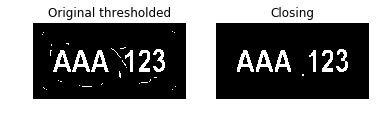

In [116]:
# Let's use an opening transformation to eliminate most of the noise

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh_4, cv2.MORPH_OPEN, kernel)

plt.subplot(121)
plt.title('Original thresholded')
plt.axis('off')
plt.imshow(thresh_4, cmap='gray')
plt.subplot(122)
plt.title('Closing')
plt.axis('off')
plt.imshow(opening, cmap='gray')

Nice, most of the noise was taked off!! Now let's begin with a masking job to extract ROIS from our original image

# Masking

'Masking' is the process of extract a Region of Interest from our images, this is basically approached using a bitwise-and operation:
```
    0101
AND 0011
  = 0001
```
In OpenCV, what we will have is a mask with only two possible values: 0 or 255 (remember, a binary image). Let's look with a concrete example from our initial splitted RGB splitted rose. The main goal is to extract its petals

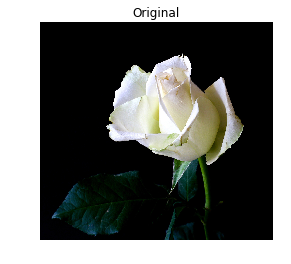

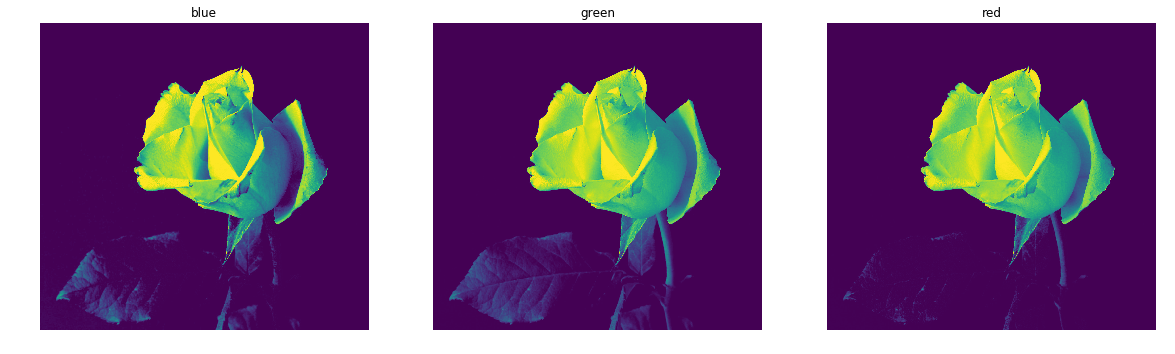

In [126]:
# Let's split another image
rose = cv2.imread("teach_images/rose.png")
blue, green, red = cv2.split(rose)

# Original one
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(rose, cv2.COLOR_BGR2RGB))
plt.show()

# Splitted channels
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.axis('off')
plt.title('blue')
plt.imshow(blue)
plt.subplot(132)
plt.axis('off')
plt.title('green')
plt.imshow(green)
plt.subplot(133)
plt.title('red')
plt.axis('off')
plt.imshow(red)

In [135]:
# Red channel is the most useful for our purposes

(T, thresh_rose) = cv2.threshold(red, 40, 255, cv2.THRESH_BINARY)

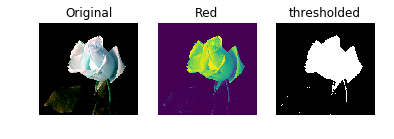

In [136]:
plt.subplot(131)
plt.title('Original')
plt.axis('off')
plt.imshow(rose)
plt.subplot(132)
plt.title('Red')
plt.axis('off')
plt.imshow(red)
plt.subplot(133)
plt.title('thresholded')
plt.axis('off')
plt.imshow(thresh_rose, cmap='gray')

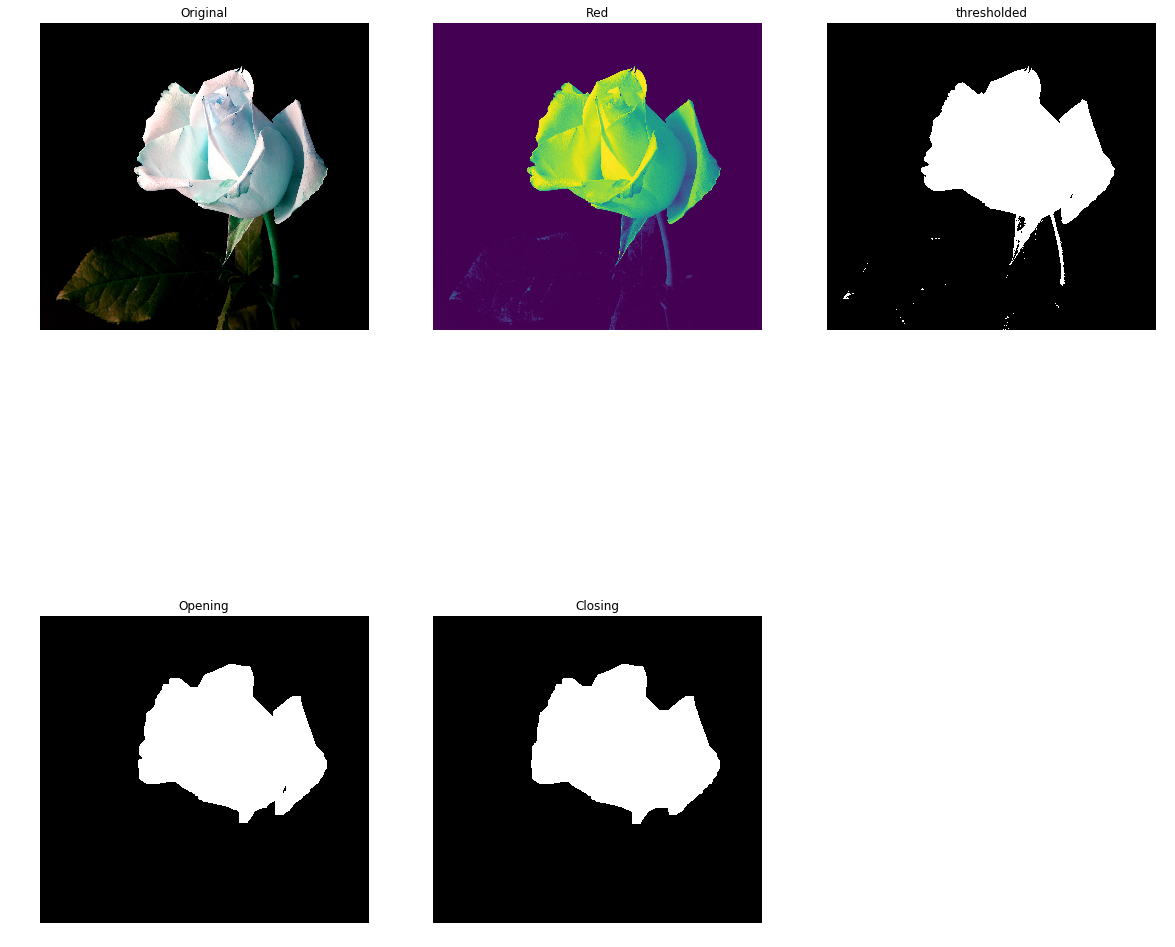

In [148]:
# Let's use an some morphological transformations to eliminate most of the noise

kernel_1 = np.ones((50,50),np.uint8)
opening_rose = cv2.morphologyEx(thresh_rose, cv2.MORPH_OPEN, kernel_1)
kernel_2 = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(opening_rose, cv2.MORPH_CLOSE, kernel_1)

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.title('Original')
plt.axis('off')
plt.imshow(rose)
plt.subplot(232)
plt.title('Red')
plt.axis('off')
plt.imshow(red)
plt.subplot(233)
plt.title('thresholded')
plt.axis('off')
plt.imshow(thresh_rose, cmap='gray')
plt.subplot(234)
plt.title('Opening')
plt.axis('off')
plt.imshow(opening_rose, cmap='gray')
plt.subplot(235)
plt.title('Closing')
plt.axis('off')
plt.imshow(closing, cmap='gray')

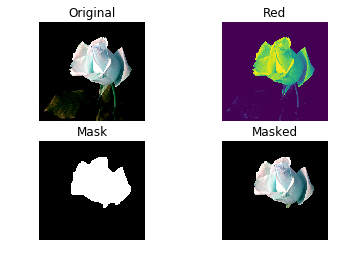

In [149]:
# Now, let's implement a masking!!
clone = rose.copy()
masked = cv2.bitwise_and(clone, clone, mask=closing)

plt.subplot(221)
plt.title('Original')
plt.axis('off')
plt.imshow(rose)
plt.subplot(222)
plt.title('Red')
plt.axis('off')
plt.imshow(red)
plt.subplot(223)
plt.title('Mask')
plt.axis('off')
plt.imshow(closing, cmap='gray')
plt.subplot(224)
plt.title('Masked')
plt.axis('off')
plt.imshow(masked)

Nice, isn't it? :)

## Contours

There is another basic Image processing concept to review: Contours. Contours are simply the outlines of an object in an image. If the image is simple enough, we might be able to get away with using the grayscale image as an input. if not, we will need to apply some transformation and artificial vision techniques to obtain a properly objetive image as we made with our rose masking.

Let's define an initial goal, we want to know in a tetris game how many pieces we need to play at time:

<img src="teach_images/tetris_goal.png">

For the example above, there are three pieces to be played properly to keep our 'live' in the game. Let's begin.


Found 5 contours


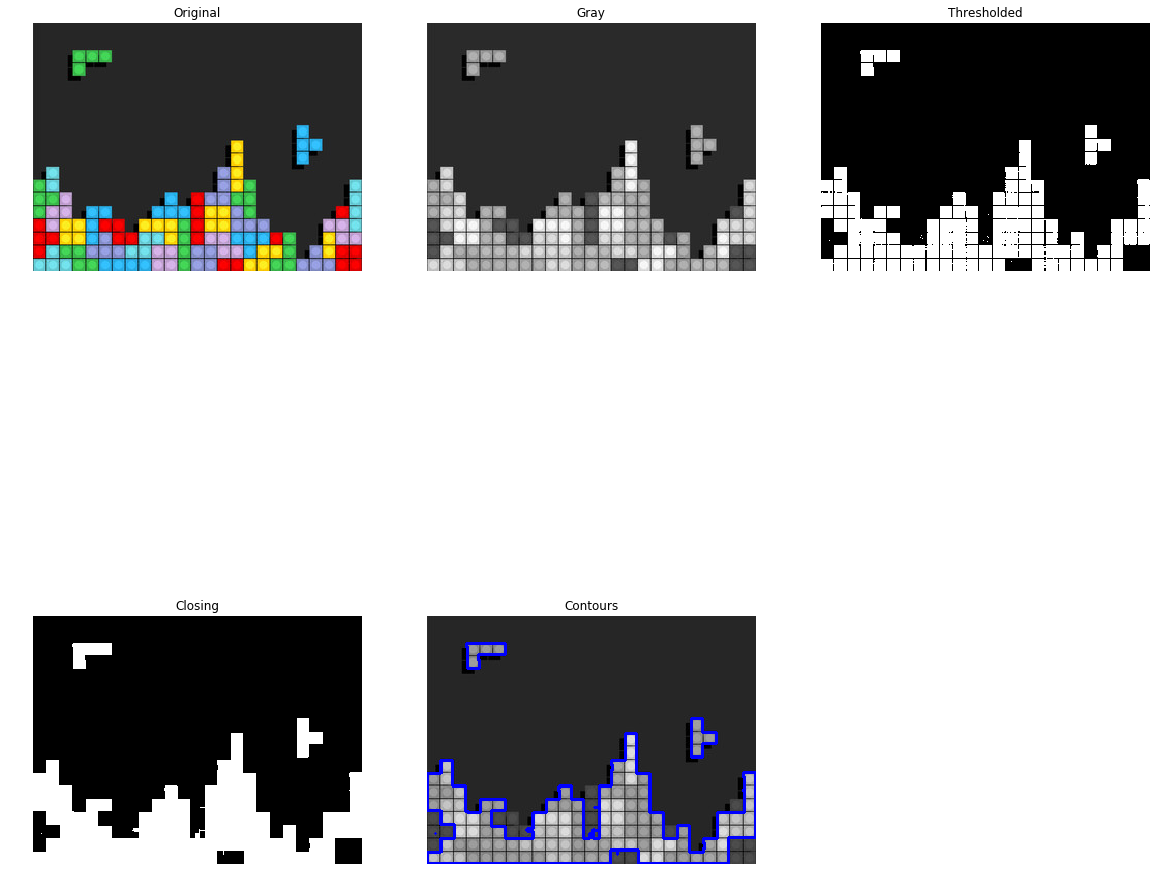

In [198]:
# Loads the image

tetris = cv2.imread("teach_images/tetris_1.png")
gray = cv2.imread("teach_images/tetris_1.png", 0)

# Applies a threshold
(T, thresh_tetris) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)

# Applies a closing
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_tetris, cv2.MORPH_CLOSE, kernel)

# Find contours 
cnts = cv2.findContours(closing.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
clone = gray.copy()
clone = cv2.cvtColor(clone, cv2.COLOR_GRAY2BGR)

# draw the contours

cv2.drawContours(clone, cnts, -1, (0, 0, 255), 2)
print("Found {} contours".format(len(cnts)))

# Shows initial results

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(tetris, cv2.COLOR_BGR2RGB))
plt.subplot(232)
plt.title('Gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.subplot(233)
plt.title('Thresholded')
plt.axis('off')
plt.imshow(thresh_tetris, cmap='gray')
plt.subplot(234)
plt.title('Closing')
plt.axis('off')
plt.imshow(closing, cmap='gray')
plt.subplot(235)
plt.title('Contours')
plt.axis('off')
plt.imshow(clone)

Look that we have drawn all the contours of our image, but we have found five of them, how can we know which of them are tetris pieces?

Let's look some more concepts:

### Area: 

The number of pixels that reside inside the contour outline. We will expect a fixed max and min area for our tetris pieces.

### Aspect Ratio

The actual definition of the a contour’s aspect ratio is as follows:

```
aspect ratio = image width / image height
```

We will expect this aspect ratio: 

```[0.2, 0.4] and [0.6, 1.7]```

Let's add just some line to inclue the area and the aspect ratio

contour number: 0 area: 0.0 aspect_ratio: 1.0
False
contour number: 1 area: 16404.5 aspect_ratio: 2.5039370078740157
False
contour number: 2 area: 46.0 aspect_ratio: 0.7777777777777778
False
contour number: 3 area: 550.5 aspect_ratio: 0.6578947368421053
True
contour number: 4 area: 537.0 aspect_ratio: 1.52
True
The number of pieces to play is 2


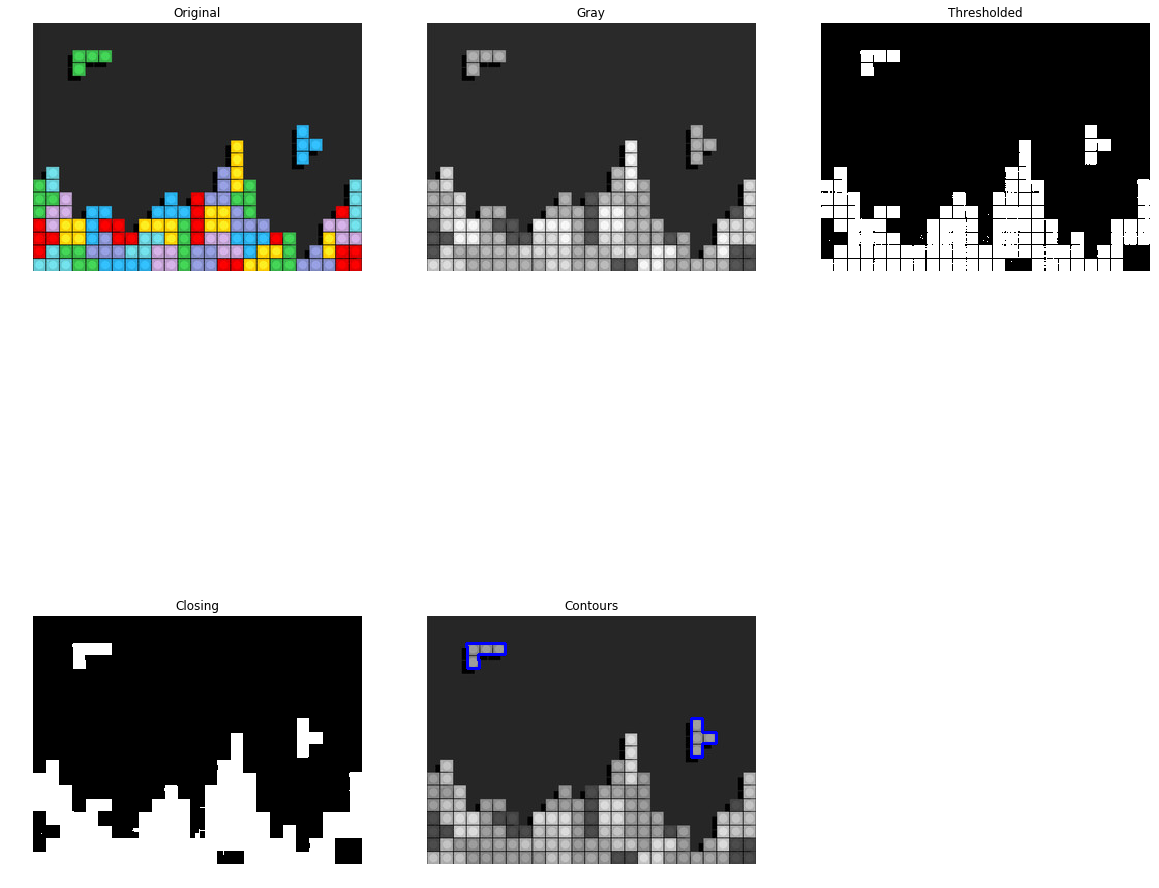

In [229]:
# Loads the image

tetris = cv2.imread("teach_images/tetris_1.png")
gray = cv2.imread("teach_images/tetris_1.png", 0)

# Applies a threshold
(T, thresh_tetris) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)

# Applies a closing
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_tetris, cv2.MORPH_CLOSE, kernel)

# Find contours 
contours = cv2.findContours(closing.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
clone = gray.copy()
clone = cv2.cvtColor(clone, cv2.COLOR_GRAY2BGR)
cnts = []

for (i, c) in enumerate(contours):
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    checked = 0
 
    aspect_ratio = w / float(h)
    
    checked = (area>400 and area<700) 
    checked = checked and ((aspect_ratio>=0.2  and aspect_ratio<=0.4) or (aspect_ratio>=0.6 and aspect_ratio<=1.8))
    
    print("contour number: {} area: {} aspect_ratio: {}".format(i, area, aspect_ratio))
    print(checked)
    
    if checked:
        cnts.append(c)

# draw the contours
cv2.drawContours(clone, cnts, -1, (0, 0, 255), 2)
# Shows initial results

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(tetris, cv2.COLOR_BGR2RGB))
plt.subplot(232)
plt.title('Gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.subplot(233)
plt.title('Thresholded')
plt.axis('off')
plt.imshow(thresh_tetris, cmap='gray')
plt.subplot(234)
plt.title('Closing')
plt.axis('off')
plt.imshow(closing, cmap='gray')
plt.subplot(235)
plt.title('Contours')
plt.axis('off')
plt.imshow(clone)

# Prints the result

print("The number of pieces to play is {}".format(len(cnts)))

## Image Comparing

Finally, let's apply all that we have seen for image comparing.


71


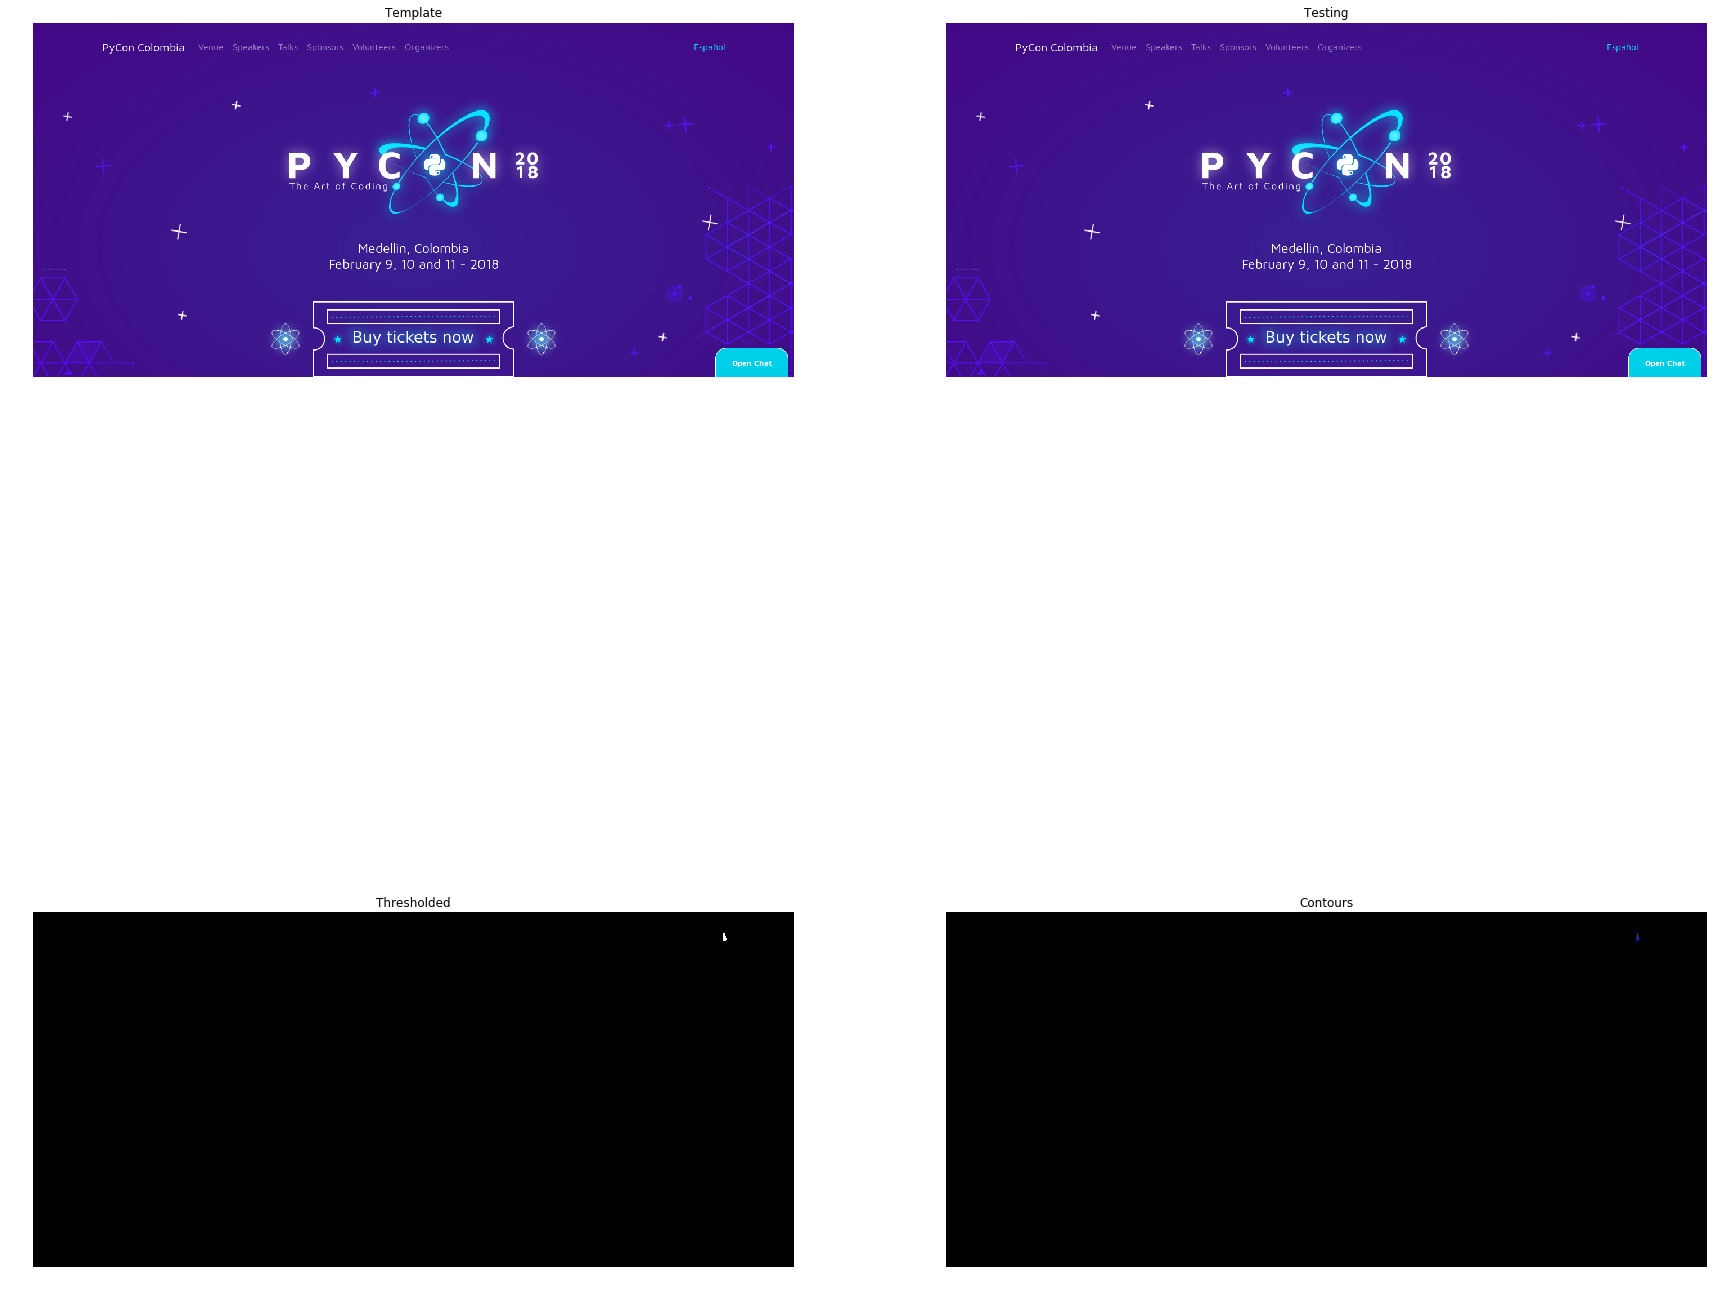

In [235]:
# Image compare script

template = cv2.imread("teach_images/pycon_template.png")
testing = cv2.imread("teach_images/pycon_testing.png")

template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
testing_gray = cv2.cvtColor(testing, cv2.COLOR_RGB2GRAY)

# Applies a bitwise XOR operation that will return one only if some pixel is different
xor = np.bitwise_xor(template_gray, testing_gray)
ones = cv2.countNonZero(xor)

print(ones)

# Let's paint the differences, if there is any

if ones > 0:
    result = cv2.absdiff(template, testing)
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 1, 255, 0)
    
    # Find contours
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
    cv2.drawContours(result, cnts, -1, (0, 0, 255), 1)


plt.figure(figsize=(30, 30))
plt.subplot(221)
plt.title('Template')
plt.axis('off')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.title('Testing')
plt.axis('off')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.title('Thresholded')
plt.axis('off')
plt.imshow(thresh, cmap='gray')
plt.subplot(224)
plt.title('Contours')
plt.axis('off')
plt.imshow(result, cmap='gray')

Nice!!! You have drawn the images differences.

Hope you have enjoyed this lesson :)

All the best,

José García